In [1]:
# ASN Pairings Mean MOS, Mean Qualfun, and Percentage "Bad" Calls

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import geoip2.database
import ipaddress
import os
import dask.dataframe as dd

In [3]:
# functions to get AS info
def getASobject(x):
    ip = ipaddress.ip_address(x)
    try: return readerASN.asn(str(ip))
    except: return "The address {} is not in the database.".format(ip)
def getIP(x):
    if type(x) == str: return x
    return x.ip_address
def getASN(x):
    if type(x) == str: return x
    return x.autonomous_system_number
def getASorg(x):
    if type(x) == str: return x
    return x.autonomous_system_organization
def getInt(x):
    return int(x)

In [4]:
def getcount(row):
    a=int(row['a_saddr'])
    b=int(row['b_saddr'])
    
    df_asaddr=df['a_saddr']
    df_new=df[df['a_saddr']==a][df['b_saddr']==b]

    return len(df_new)

def getbadcount(row):
    a=int(row['a_saddr'])
    b=int(row['b_saddr'])
    
    df_asaddr=df_filtered['a_saddr']
    df_new=df_filtered[df_filtered['a_saddr']==a][df_filtered['b_saddr']==b]

    return len(df_new)

def getbqualfunmean(row):
    a=int(row['a_saddr'])
    b=int(row['b_saddr'])
    
    df_asaddr=df['a_saddr']
    df_new=df[df['a_saddr']==a][df['b_saddr']==b]

    return df_new['b_qualfun'].mean()

def getmosmean(row):
    a=int(row['a_saddr'])
    b=int(row['b_saddr'])
    
    df_asaddr=df['a_saddr']
    df_new=df[df['a_saddr']==a][df['b_saddr']==b]

    return df_new['b_mos_adapt_mult10'].mean()

In [5]:
CSV_FILE_PATH = os.path.join('cdr_from_2018-05-01-order-calldate-asc.csv')

HEADER = ["ID","calldate","callend","duration","connect_duration","progress_time","first_rtp_time","caller",
          "caller_domain","caller_reverse","callername","callername_reverse","called","called_domain","called_reverse",
          "sipcallerip","sipcallerport","sipcalledip","sipcalledport","whohanged","bye","lastSIPresponse_id",
          "lastSIPresponseNum","sighup","dscp","a_index","b_index","a_payload","b_payload","a_saddr","b_saddr",
          "a_received","b_received","a_lost","b_lost","a_ua_id","b_ua_id","a_avgjitter_mult10","b_avgjitter_mult10",
          "a_maxjitter","b_maxjitter","a_sl1","a_sl2","a_sl3","a_sl4","a_sl5","a_sl6","a_sl7","a_sl8","a_sl9","a_sl10",
          "a_d50","a_d70","a_d90","a_d120","a_d150","a_d200","a_d300","b_sl1","b_sl2","b_sl3","b_sl4","b_sl5","b_sl6","b_sl7",
          "b_sl8","b_sl9","b_sl10","b_d50","b_d70","b_d90","b_d120","b_d150","b_d200","b_d300","a_mos_lqo_mult10",
          "b_mos_lqo_mult10","a_mos_f1_mult10","a_mos_f2_mult10","a_mos_adapt_mult10","b_mos_f1_mult10","b_mos_f2_mult10",
          "b_mos_adapt_mult10","a_rtcp_loss","a_rtcp_maxfr","a_rtcp_avgfr_mult10","a_rtcp_maxjitter","a_rtcp_avgjitter_mult10",
          "b_rtcp_loss","b_rtcp_maxfr","b_rtcp_avgfr_mult10","b_rtcp_maxjitter","b_rtcp_avgjitter_mult10","a_last_rtp_from_end",
          "b_last_rtp_from_end","payload","jitter_mult10","mos_min_mult10","a_mos_min_mult10","b_mos_min_mult10",
          "packet_loss_perc_mult1000","a_packet_loss_perc_mult1000","b_packet_loss_perc_mult1000","delay_sum","a_delay_sum",
          "b_delay_sum","delay_avg_mult100","a_delay_avg_mult100","b_delay_avg_mult100","delay_cnt","a_delay_cnt",
          "b_delay_cnt","rtcp_avgfr_mult10","rtcp_avgjitter_mult10","lost","id_sensor","price_operator_mult100",
          "price_operator_currency_id","price_customer_mult100","price_customer_currency_id","reason_sip_cause",
          "reason_sip_text_id","reason_q850_cause","reason_q850_text_id","caller_silence","called_silence",
          "caller_silence_end","called_silence_end","a_mos_xr_min_mult10","b_mos_xr_min_mult10","a_mos_xr_mult10",
          "b_mos_xr_mult10","response_time_100","response_time_xxx","a_mos_f1_min_mult10","a_mos_f2_min_mult10",
          "a_mos_adapt_min_mult10","b_mos_f1_min_mult10","b_mos_f2_min_mult10","b_mos_adapt_min_mult10","a_rtp_ptime",
          "b_rtp_ptime","flags"]

df = pd.read_csv(CSV_FILE_PATH,low_memory=False,names=HEADER)

In [6]:
def evaluaterow(a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, delay_sum, connect_duration):

    calc_sum = get_sum(a1, a2, a3, a4, a5, a6, a7, a8, a9, a10)

    final_sum = (delay_sum + calc_sum)/(connect_duration*1000) #+ calc_sum)

    return final_sum


def get_sum(a1, a2, a3, a4, a5, a6, a7, a8, a9, a10):
    top_sum = 0
    n = 1
    w1 = 1
    w2 = 2
    w3 = 3
    w4 = 4
    w5 = 5
    w6 = 6
    w7 = 7
    w8 = 8
    w9 = 9
    w10 = 10

    top_sum += 20 * n * (a1) * (w1 - 1)
    n += 1
    top_sum += 20 * n * (a2) * (w2 - 1)
    n += 1
    top_sum += 20 * n * (a3) * (w3 - 1)
    n += 1
    top_sum += 20 * n * (a4) * (w4 - 1)
    n += 1
    top_sum += 20 * n * (a5) * (w5 - 1)
    n += 1
    top_sum += 20 * n * (a6) * (w6 - 1)
    n += 1
    top_sum += 20 * n * (a7) * (w7 - 1)
    n += 1
    top_sum += 20 * n * (a8) * (w8 - 1)
    n += 1
    top_sum += 20 * n * (a9) * (w9 - 1)
    n += 1
    top_sum += 20 * n * (a10) * (w10 - 1)

    return (top_sum)


df_qualfun_a = df.apply(lambda df2: evaluaterow(df2['a_sl1'],df2['a_sl2'],df2['a_sl3'],df2['a_sl4'],df2['a_sl5'],df2['a_sl6'],df2['a_sl7'],df2['a_sl8'],df2['a_sl9'],df2['a_sl10'],df2['a_delay_sum'],df2['connect_duration']), axis=1)


df_qualfun_b = df.apply(lambda df2: evaluaterow(df2['b_sl1'],df2['b_sl2'],df2['b_sl3'],df2['b_sl4'],df2['b_sl5'],df2['b_sl6'],df2['b_sl7'],df2['b_sl8'],df2['b_sl9'],df2['b_sl10'],df2['b_delay_sum'],df2['connect_duration']), axis=1)



#df = df.assign(qualfun=df_qualfun)
#df.compute()
#dfqf = df_qualfun.compute()

In [8]:
df['a_qualfun'] = df_qualfun_a
df['b_qualfun'] = df_qualfun_b

In [9]:
filename='van_rtp_unique_ip'

DATA_PATH = (filename+'.csv')
DESCRIBED_COLUMNS = ['a_saddr','b_saddr','a_saddr_asn', 'a_saddr_asorg', 'a_saddr_lat', 'a_saddr_long','b_saddr_asn', 'b_saddr_asorg', 'b_saddr_lat', 'b_saddr_long','send_A']

# read dataframe. calldate and callend are the only date columns
df_pairings_van = pd.read_csv(DATA_PATH)
df_pairings_van = df_pairings_van[DESCRIBED_COLUMNS]

df_pairings_van['count']=df_pairings_van.apply(getcount,axis=1)
#df_pairings_van['mean_qualfun']=df_pairings_van.apply(getbqualfunmean,axis=1)
#df_pairings_van['mean_mos']=df_pairings_van.apply(getmosmean,axis=1)

#df_pairings_van.to_csv(filename+'_wextra.csv')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [10]:
filename='tor_rtp_unique_ip'

DATA_PATH = (filename+'.csv')
DESCRIBED_COLUMNS = ['a_saddr','b_saddr','a_saddr_asn', 'a_saddr_asorg', 'a_saddr_lat', 'a_saddr_long','b_saddr_asn', 'b_saddr_asorg', 'b_saddr_lat', 'b_saddr_long','send_A']

# read dataframe. calldate and callend are the only date columns
df_pairings_tor = pd.read_csv(DATA_PATH)
df_pairings_tor = df_pairings_tor[DESCRIBED_COLUMNS]

df_pairings_tor['count']=df_pairings_tor.apply(getcount,axis=1)
#df_pairings_tor['mean_qualfun']=df_pairings_tor.apply(getbqualfunmean,axis=1)
#df_pairings_tor['mean_mos']=df_pairings_tor.apply(getmosmean,axis=1)

#df_pairings_tor.to_csv(filename+'wcount.csv')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [11]:
filename='mtl_rtp_unique_ip'

DATA_PATH = (filename+'.csv')
DESCRIBED_COLUMNS = ['a_saddr','b_saddr','a_saddr_asn', 'a_saddr_asorg', 'a_saddr_lat', 'a_saddr_long','b_saddr_asn', 'b_saddr_asorg', 'b_saddr_lat', 'b_saddr_long','send_A']

# read dataframe. calldate and callend are the only date columns
df_pairings_mtl = pd.read_csv(DATA_PATH)
df_pairings_mtl = df_pairings_mtl[DESCRIBED_COLUMNS]

df_pairings_mtl['count']=df_pairings_mtl.apply(getcount,axis=1)
#df_pairings_mtl['mean_qualfun']=df_pairings_mtl.apply(getbqualfunmean,axis=1)
#df_pairings_mtl['mean_mos']=df_pairings_mtl.apply(getmosmean,axis=1)

#df_pairings_mtl.to_csv(filename+'wcount.csv')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [25]:
def getcount(row):
    a=int(row['a_saddr'])
    b=int(row['b_saddr'])
    
    df_asaddr=df['a_saddr']
    df_new=df[df['a_saddr']==a][df['b_saddr']==b]

    return len(df_new)

def getbqualfunmean(row):
    
    a=int(row['a_saddr'])
    b=int(row['b_saddr'])
    
    df_asaddr=df['a_saddr']
    df_new=df[df['a_saddr']==a][df['b_saddr']==b]

    if row['send_A']:
        return df_new['a_qualfun'].mean()
    else:
        return df_new['b_qualfun'].mean()

def getmosmean(row):
    a=int(row['a_saddr'])
    b=int(row['b_saddr'])
    
    df_asaddr=df['a_saddr']
    df_new=df[df['a_saddr']==a][df['b_saddr']==b]
    
    if row['send_A']:
        return df_new['a_mos_adapt_mult10'].mean()
    else:
        return df_new['b_mos_adapt_mult10'].mean()
    
def getbadratio(row):
    total_count=float(row['count'])
    bad_count=float(row['bad_count'])

    return bad_count/total_count

In [55]:
thresh=0.02

df_filtered_a=df[df['a_qualfun']>thresh]
df_filtered_b=df[df['b_qualfun']>thresh]

def getbadcount(row):
    a=int(row['a_saddr'])
    b=int(row['b_saddr'])
    
    if row['send_A']:
        df_new=df_filtered_a[df_filtered_a['a_saddr']==a][df_filtered_a['b_saddr']==b]
    else:
        df_new=df_filtered_b[df_filtered_b['a_saddr']==a][df_filtered_b['b_saddr']==b]
                
    return len(df_new)

In [65]:
# Create matrix

df_pairings_raw=df_pairings_van

df_pairings_raw['bad_count']=df_pairings_raw.apply(getbadcount,axis=1)
df_pairings_raw['bad_ratio']=df_pairings_raw.apply(getbadratio,axis=1)

df_pairings=df_pairings_raw[df_pairings_raw['a_saddr_asorg']=='CloudPBX']

df_asnpairings=df_pairings.groupby(['a_saddr_asn','b_saddr_asn'])[['count','bad_count']].sum()

aasn_array = []
basn_array = []
parameter_array= []

for row in df_asnpairings.iterrows():
    if float(row[1]['bad_count'])>30:
        aasn_array.append(int(row[0][0]))
        basn_array.append(int(row[0][1]))
        parameter_array.append(float(row[1]['bad_count'])/float(row[1]['count']))
    

#asnlist=sorted(list(set(df['a_saddr_asn'].unique()).union(set(df['b_saddr_asn'].unique()))))

no_entries=len(aasn_array)
asnlist=sorted(list(set(aasn_array).union(set(basn_array))))

aasnlist=sorted(list(set(aasn_array)))
basnlist=sorted(list(set(basn_array)))
no_aasn=len(aasnlist)
no_basn=len(basnlist)


#no_asn=len(asnlist)
#print(no_aasn)
#print(no_basn)

asn_par=np.zeros([no_aasn,no_basn])
for i in range(0,no_entries):
    row=aasnlist.index(aasn_array[i])
    column=basnlist.index(basn_array[i])
    asn_par[row,column]=parameter_array[i]
    


aasorglist=list()
basorglist=list()

for asn in iter(aasnlist):
    aasorglist.append(df_pairings[df_pairings['a_saddr_asn']==asn]['a_saddr_asorg'][0:1].values[0])

for asn in iter(basnlist):
    basorglist.append(df_pairings[df_pairings['b_saddr_asn']==asn]['b_saddr_asorg'][0:1].values[0])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


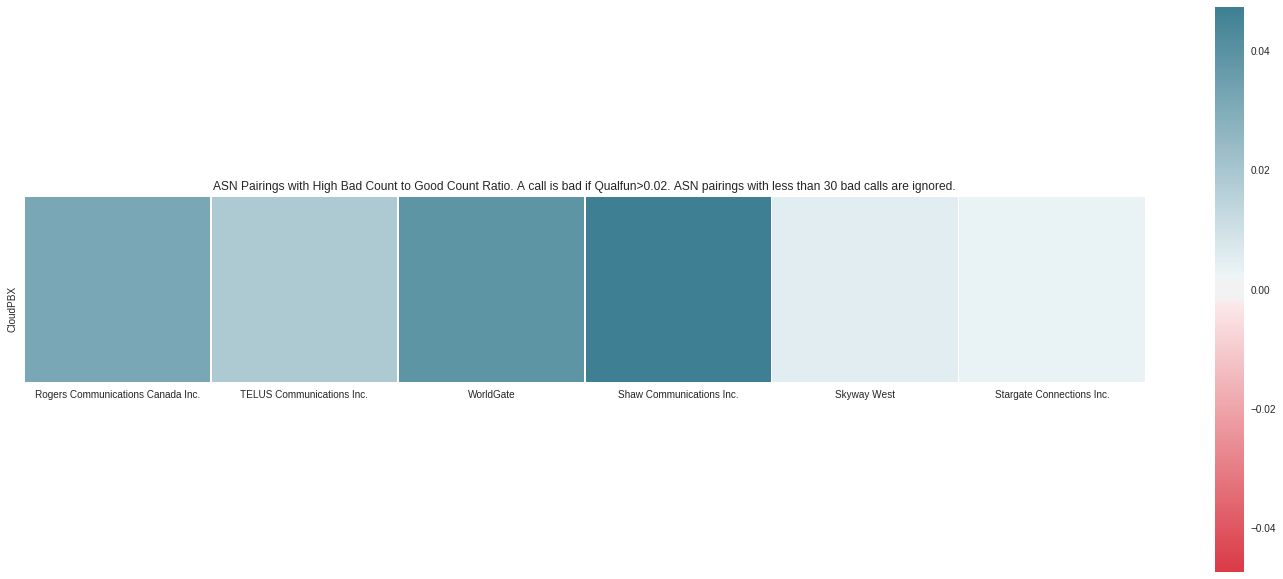

In [66]:
plt.rcParams['axes.labelsize'] = 10
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 16))

plt.title('ASN Pairings with High Bad Count to Good Count Ratio. A call is bad if Qualfun>0.02. ASN pairings with less than 30 bad calls are ignored.')

# We want to show all ticks...
#ax.set_xticks(np.arange(len(farmers)))
#ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
#ax.set_xticklabels(basnlist)
#ax.set_yticklabels(aasnlist)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(asn_par, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},yticklabels=aasorglist,xticklabels=basorglist);
plt.tight_layout()
plt.savefig('./img/asorg_badcallsratio_byQualfun_1millionstar_aCloudPBX_van.png', dpi=600)

In [67]:
# Create matrix

df_pairings_raw=df_pairings_van

df_pairings_raw['bad_count']=df_pairings_raw.apply(getbadcount,axis=1)
df_pairings_raw['bad_ratio']=df_pairings_raw.apply(getbadratio,axis=1)

df_pairings=df_pairings_raw[df_pairings_raw['b_saddr_asorg']=='CloudPBX']

df_asnpairings=df_pairings.groupby(['a_saddr_asn','b_saddr_asn'])[['count','bad_count']].sum()

aasn_array = []
basn_array = []
parameter_array= []

for row in df_asnpairings.iterrows():
    if float(row[1]['bad_count'])>30:
        aasn_array.append(int(row[0][0]))
        basn_array.append(int(row[0][1]))
        parameter_array.append(float(row[1]['bad_count'])/float(row[1]['count']))
    

#asnlist=sorted(list(set(df['a_saddr_asn'].unique()).union(set(df['b_saddr_asn'].unique()))))

no_entries=len(aasn_array)
asnlist=sorted(list(set(aasn_array).union(set(basn_array))))

aasnlist=sorted(list(set(aasn_array)))
basnlist=sorted(list(set(basn_array)))
no_aasn=len(aasnlist)
no_basn=len(basnlist)


#no_asn=len(asnlist)
#print(no_aasn)
#print(no_basn)

asn_par=np.zeros([no_aasn,no_basn])
for i in range(0,no_entries):
    row=aasnlist.index(aasn_array[i])
    column=basnlist.index(basn_array[i])
    asn_par[row,column]=parameter_array[i]
    
asn_par=asn_par.transpose()

aasorglist=list()
basorglist=list()

for asn in iter(aasnlist):
    aasorglist.append(df_pairings[df_pairings['a_saddr_asn']==asn]['a_saddr_asorg'][0:1].values[0])

for asn in iter(basnlist):
    basorglist.append(df_pairings[df_pairings['b_saddr_asn']==asn]['b_saddr_asorg'][0:1].values[0])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


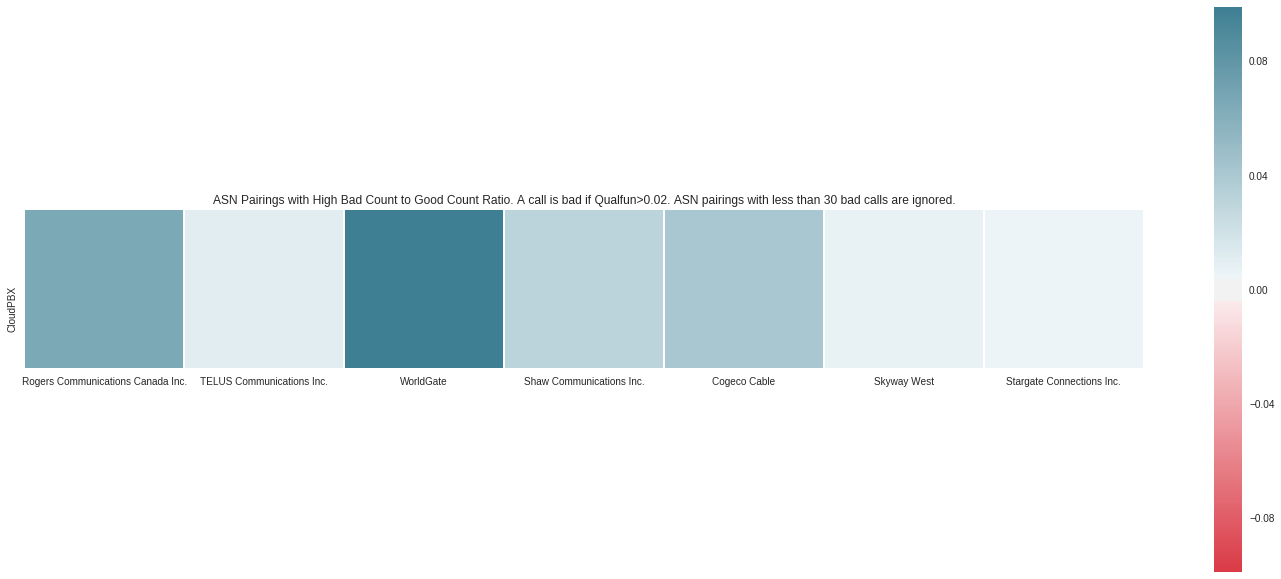

In [68]:
plt.rcParams['axes.labelsize'] = 10
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 16))

plt.title('ASN Pairings with High Bad Count to Good Count Ratio. A call is bad if Qualfun>0.02. ASN pairings with less than 30 bad calls are ignored.')

# We want to show all ticks...
#ax.set_xticks(np.arange(len(farmers)))
#ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
#ax.set_xticklabels(basnlist)
#ax.set_yticklabels(aasnlist)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(asn_par, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},yticklabels=basorglist,xticklabels=aasorglist);
plt.tight_layout()
plt.savefig('./img/asorg_badcallsratio_byQualfun_1millionstar_bCloudPBX_van.png', dpi=600)

In [73]:
df_pairings_comb=df_pairings_van.merge(df_pairings_mtl,how='outer')
df_pairings_comb=df_pairings_comb.merge(df_pairings_tor,how='outer')

In [95]:
# Create matrix

df_pairings_raw=df_pairings_comb

df_pairings_raw['bad_count']=df_pairings_raw.apply(getbadcount,axis=1)
df_pairings_raw['bad_ratio']=df_pairings_raw.apply(getbadratio,axis=1)

df_pairings=df_pairings_raw[df_pairings_raw['a_saddr_asorg']=='CloudPBX']

df_asnpairings=df_pairings.groupby(['a_saddr_asn','b_saddr_asn'])[['count','bad_count']].sum()

aasn_array = []
basn_array = []
parameter_array= []

for row in df_asnpairings.iterrows():
    if float(row[1]['bad_count'])>30:
        aasn_array.append(int(row[0][0]))
        basn_array.append(int(row[0][1]))
        parameter_array.append(float(row[1]['bad_count'])/float(row[1]['count']))
    

#asnlist=sorted(list(set(df['a_saddr_asn'].unique()).union(set(df['b_saddr_asn'].unique()))))

no_entries=len(aasn_array)
asnlist=sorted(list(set(aasn_array).union(set(basn_array))))

aasnlist=sorted(list(set(aasn_array)))
basnlist=sorted(list(set(basn_array)))
no_aasn=len(aasnlist)
no_basn=len(basnlist)


#no_asn=len(asnlist)
#print(no_aasn)
#print(no_basn)

asn_par=np.zeros([no_aasn,no_basn])
for i in range(0,no_entries):
    row=aasnlist.index(aasn_array[i])
    column=basnlist.index(basn_array[i])
    asn_par[row,column]=parameter_array[i]
    


aasorglist=list()
basorglist=list()

for asn in iter(aasnlist):
    aasorglist.append(df_pairings[df_pairings['a_saddr_asn']==asn]['a_saddr_asorg'][0:1].values[0])

for asn in iter(basnlist):
    basorglist.append(df_pairings[df_pairings['b_saddr_asn']==asn]['b_saddr_asorg'][0:1].values[0])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


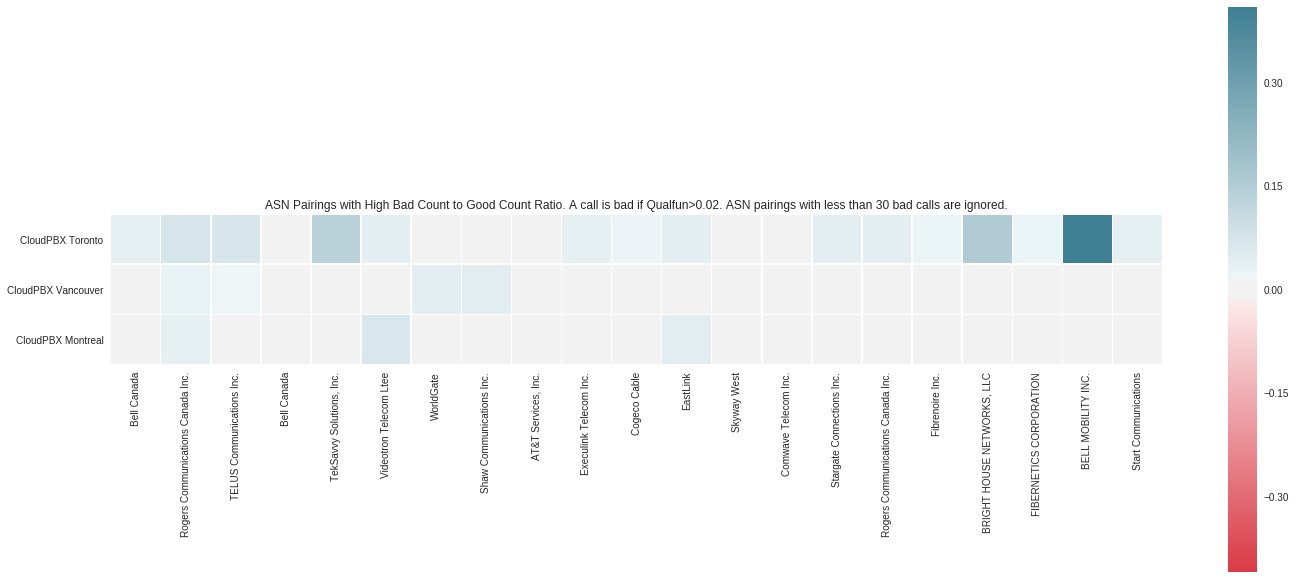

In [96]:
plt.rcParams['axes.labelsize'] = 10
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 16))

plt.title('ASN Pairings with High Bad Count to Good Count Ratio. A call is bad if Qualfun>0.02. ASN pairings with less than 30 bad calls are ignored.')

# We want to show all ticks...
#ax.set_xticks(np.arange(len(farmers)))
#ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
#ax.set_xticklabels(basnlist)
#ax.set_yticklabels(aasnlist)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(asn_par, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},yticklabels=cloudpbxlist,xticklabels=basorglist);
plt.tight_layout()
plt.savefig('./img/asorg_badcallsratio_byQualfun_1millionstar_aCloudPBX_all.png', dpi=600)

In [93]:
# Create matrix

df_pairings_raw=df_pairings_comb

df_pairings_raw['bad_count']=df_pairings_raw.apply(getbadcount,axis=1)
df_pairings_raw['bad_ratio']=df_pairings_raw.apply(getbadratio,axis=1)

df_pairings=df_pairings_raw[df_pairings_raw['b_saddr_asorg']=='CloudPBX']

df_asnpairings=df_pairings.groupby(['a_saddr_asn','b_saddr_asn'])[['count','bad_count']].sum()

aasn_array = []
basn_array = []
parameter_array= []

for row in df_asnpairings.iterrows():
    if float(row[1]['bad_count'])>30:
        aasn_array.append(int(row[0][0]))
        basn_array.append(int(row[0][1]))
        parameter_array.append(float(row[1]['bad_count'])/float(row[1]['count']))
    

#asnlist=sorted(list(set(df['a_saddr_asn'].unique()).union(set(df['b_saddr_asn'].unique()))))

no_entries=len(aasn_array)
asnlist=sorted(list(set(aasn_array).union(set(basn_array))))

aasnlist=sorted(list(set(aasn_array)))
basnlist=sorted(list(set(basn_array)))
no_aasn=len(aasnlist)
no_basn=len(basnlist)


#no_asn=len(asnlist)
#print(no_aasn)
#print(no_basn)

asn_par=np.zeros([no_aasn,no_basn])
for i in range(0,no_entries):
    row=aasnlist.index(aasn_array[i])
    column=basnlist.index(basn_array[i])
    asn_par[row,column]=parameter_array[i]
    
asn_par=asn_par.transpose()

aasorglist=list()
basorglist=list()

for asn in iter(aasnlist):
    aasorglist.append(df_pairings[df_pairings['a_saddr_asn']==asn]['a_saddr_asorg'][0:1].values[0])

for asn in iter(basnlist):
    basorglist.append(df_pairings[df_pairings['b_saddr_asn']==asn]['b_saddr_asorg'][0:1].values[0])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


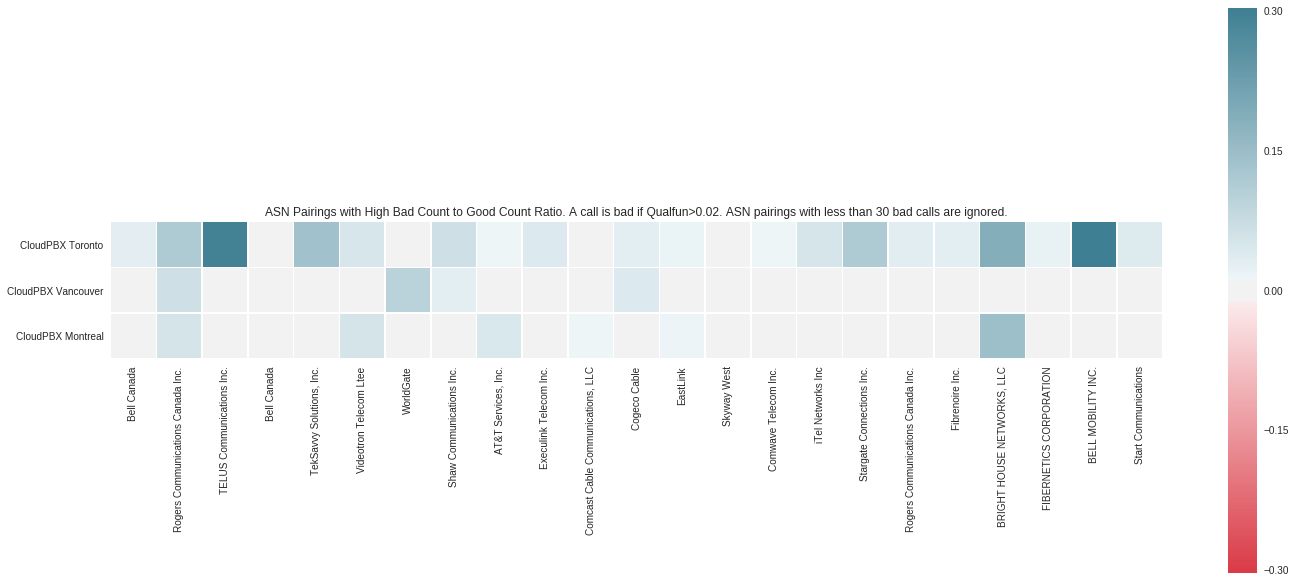

In [94]:
plt.rcParams['axes.labelsize'] = 10
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 16))

plt.title('ASN Pairings with High Bad Count to Good Count Ratio. A call is bad if Qualfun>0.02. ASN pairings with less than 30 bad calls are ignored.')

# We want to show all ticks...
#ax.set_xticks(np.arange(len(farmers)))
#ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
#ax.set_xticklabels(basnlist)
#ax.set_yticklabels(aasnlist)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(asn_par, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},yticklabels=cloudpbxlist,xticklabels=aasorglist);
plt.tight_layout()
plt.savefig('./img/asorg_badcallsratio_byQualfun_1millionstar_bCloudPBX_all.png', dpi=600)

In [89]:
basnlist

[393755, 395152, 395766]

In [90]:
aasnlist=[393755, 395152, 395766]

cloudpbxlist=['CloudPBX Toronto','CloudPBX Vancouver','CloudPBX Montreal']